## GRADIENT DESCENT (GRADYAN İNİŞİ)

`Gradient Descent` yöntemi, birbirinden farklı problemler için optimum sonucu bulabilme yeteneğine sahip bir **eniyileme/optimizasyon** algoritmasıdır. Gradient Descent yöntemindeki anafikir, parametreleri her iterasyonda tekrar revize ederek/ayarlayarak maliyet fonksiyonunu en aza indirmektir.

Bununla birlite Gradient Descent yöntemi, neredeysa bütün Machine Learning algoritmaları için kullanılır ve bu algoritmaların çalışma mantığını içselleştirmek bakımından oldukça mühimdir.

***

### DATA OLUŞTURALIM

* Gradient Descent yöntemini incelemek üzere kendi örnek verimizi yaratalım.

In [1]:
# Gerekli kütüphaneleri import edelim.

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 100 adet random değişken üretiyoruz ve bu değişkenleri 2 ile çarpıyoruz.
# Böylece 0 - 2 aralığında 100 adet değer üretmiş oluyoruz.

X = 2 * np.random.rand(100 , 1)

In [5]:
# Ürettiğimiz değerleri görelim.

print(X)

[[1.14695094]
 [1.19581011]
 [0.95122919]
 [0.95598688]
 [0.86465535]
 [0.78997266]
 [1.56701806]
 [1.92007702]
 [1.69444839]
 [0.16088467]
 [0.60133897]
 [0.84940402]
 [0.68723756]
 [1.82054275]
 [0.62720722]
 [1.01678391]
 [1.52994935]
 [0.87402412]
 [1.49215768]
 [1.57972903]
 [1.62460243]
 [0.45780134]
 [1.83154112]
 [1.45976439]
 [1.12642955]
 [1.90223825]
 [0.76243323]
 [0.94007569]
 [1.38935885]
 [0.75974195]
 [1.67262507]
 [0.59644935]
 [0.13535168]
 [0.24877379]
 [1.80045602]
 [1.72693148]
 [0.24779293]
 [0.13266979]
 [1.61133441]
 [1.61844642]
 [0.30228168]
 [0.53117967]
 [1.82840218]
 [1.52872479]
 [1.23285652]
 [0.32242815]
 [1.20934063]
 [0.93604901]
 [0.30926405]
 [1.57266379]
 [0.41751478]
 [1.54092154]
 [0.21854869]
 [1.54213342]
 [0.49926353]
 [1.29486716]
 [1.73879953]
 [0.62166047]
 [0.2491115 ]
 [1.62914767]
 [1.1953707 ]
 [0.95210873]
 [1.72668754]
 [1.94710846]
 [0.12180318]
 [1.00934869]
 [0.86312025]
 [0.51943002]
 [1.56104257]
 [0.95146882]
 [1.21321901]
 [1.45

In [6]:
# Ürettiğimiz değer listesinin veri tipini öğrenelim.

type(X)

numpy.ndarray

* Normalde X ile y arasındaki ilişkiyi önceden bilemeyiz. Bunu, önceki konularda X ile y arasındaki ilişkiyi bulmak için Regresyon modelleri kullanırken öğrenmiştik. Ancak, şu an ki senaryoya göre X ile y değerleri arasındaki ilişkiyi bildiğimizi farz ederek işlemlerimizi gerçekleştireceğiz.

In [7]:
# X ile y değerleri arasındaki ilişki.

y = 4 + 3 * X + np.random.rand(100, 1)

In [8]:
# y değerini görelim

print(y)

[[ 7.75565012]
 [ 8.5860163 ]
 [ 6.86261456]
 [ 7.18751853]
 [ 7.30775581]
 [ 6.66032702]
 [ 9.32622281]
 [10.0899023 ]
 [ 9.88052427]
 [ 4.67005457]
 [ 5.95356004]
 [ 7.02516296]
 [ 6.6652107 ]
 [ 9.59120181]
 [ 6.75455395]
 [ 7.36413595]
 [ 8.97657305]
 [ 6.83390253]
 [ 8.93701913]
 [ 9.6165385 ]
 [ 9.09964708]
 [ 6.1205647 ]
 [10.38240217]
 [ 9.05698432]
 [ 7.44181251]
 [10.46676603]
 [ 6.80250758]
 [ 7.31890837]
 [ 8.64224195]
 [ 6.87752732]
 [ 9.88006046]
 [ 5.85820632]
 [ 4.96246059]
 [ 5.58175134]
 [ 9.74390623]
 [10.0706421 ]
 [ 5.14759871]
 [ 4.97814284]
 [ 8.84622188]
 [ 9.83383953]
 [ 5.80420049]
 [ 6.44219559]
 [10.47456996]
 [ 9.47666318]
 [ 7.95712352]
 [ 5.78508158]
 [ 7.65228727]
 [ 6.930681  ]
 [ 5.51175919]
 [ 8.81671619]
 [ 5.69368037]
 [ 9.05153725]
 [ 5.20809754]
 [ 9.26043934]
 [ 5.79236588]
 [ 8.00180046]
 [10.09345771]
 [ 6.59985279]
 [ 5.30229195]
 [ 8.90371115]
 [ 7.75232908]
 [ 6.94520724]
 [ 9.77210517]
 [10.75260185]
 [ 4.99588066]
 [ 7.99270557]
 [ 7.23220

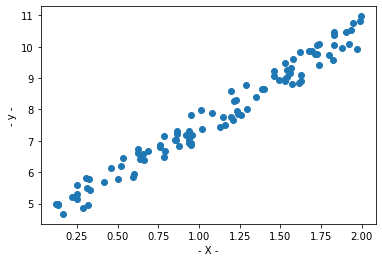

In [9]:
# X ile y arasındaki ilişkiyi görselleştirelim.

plt.scatter(X, y)
plt.xlabel("- X -")
plt.ylabel("- y -")
plt.show()

* X ile y arasındaki ilişki `lineer`'dir.

**X ile y arasındaki ilişkiyi bildiğimizi farz ederek yukarıdaki işlemleri gerçekleştirdik. Şimdi de gerçek X - y ilişkisinin fonksiyonunu yazalım.**

$$ y = w_0 + w_1X + \epsilon $$

Burada;

* $w_0$ = $\beta_0$
* $w_1$ = $\beta_1$
* $\epsilon$ = Error Rate

Ayrıca W (wight) vektörü: $W = [w_0 \ w_1]$